<a href="https://colab.research.google.com/github/hentation/Titanic.ipynb/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Импорт библиотек

In [206]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install catboost


In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Обработка


Загрузка Дата Сета

In [208]:
df = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Titanic.csv')

In [209]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [210]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [211]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [212]:
df.shape

(891, 12)

In [213]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [215]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [216]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [217]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [218]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [220]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [222]:
df['Age'].fillna(df['Age'].median(),inplace=True)

<ipython-input-222-e0c0624688bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [223]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [225]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [226]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [227]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [228]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,81,1,26.0,0,0,8,30.0000,60,0


In [229]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Modeling

In [230]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


In [231]:
import numpy as np
np.var(df['Sex'])

0.22821808306282707

A100 - 2m

# Обучение

In [232]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(7, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.4477 - loss: 0.7080 - val_accuracy: 0.5944 - val_loss: 0.6703
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5579 - loss: 0.6534 - val_accuracy: 0.6853 - val_loss: 0.6437
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6365 - loss: 0.6260 - val_accuracy: 0.7413 - val_loss: 0.6216
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7172 - loss: 0.6192 - val_accuracy: 0.7972 - val_loss: 0.6012
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7237 - loss: 0.6005 - val_accuracy: 0.7972 - val_loss: 0.5831
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7688 - loss: 0.5833 - val_accuracy: 0.8182 - val_loss: 0.5660
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7493 - loss: 0.5743 - val_accuracy: 0.8112 - val_loss: 0.5499
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7619 - loss: 0.5708 - val_accuracy: 0.8182 - val_loss: 0.

.pkl .h5 .gguf

In [233]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

['fully-connected-model.pkl']

In [234]:
model_loaded = joblib.load('fully-connected-model.pkl')

In [235]:
model_loaded.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.32833898],
       [0.16129337],
       [0.10190128],
       [0.8113732 ],
       [0.4499496 ],
       [0.8737899 ],
       [0.5324074 ],
       [0.3808114 ],
       [0.58298314],
       [0.7873401 ],
       [0.4649172 ],
       [0.09939609],
       [0.46414554],
       [0.21496429],
       [0.13835016],
       [0.82483333],
       [0.3494169 ],
       [0.6445081 ],
       [0.16795586],
       [0.5572492 ],
       [0.26048267],
       [0.23253478],
       [0.565939  ],
       [0.2034026 ],
       [0.20223667],
       [0.4098013 ],
       [0.25790396],
       [0.1980466 ],
       [0.42028636],
       [0.60507923],
       [0.18510969],
       [0.56266314],
       [0.16819452],
       [0.51221645],
       [0.25123394],
       [0.3633959 ],
       [0.519303  ],
       [0.51692224],
       [0.84851235],
       [0.14629054],
       [0.40294075],
       [0.17404959],
       [0.17452563],
       [0.18244235],
       [0.69285   ],
       [0.32118478],
       [0.2859988 ],
       [0.264

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7511 - loss: 0.4987 - val_accuracy: 0.8252 - val_loss: 0.4513
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7761 - loss: 0.4832 - val_accuracy: 0.8252 - val_loss: 0.4458
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7765 - loss: 0.4723 - val_accuracy: 0.8252 - val_loss: 0.4412
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7955 - loss: 0.4773 - val_accuracy: 0.8322 - val_loss: 0.4382
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7865 - loss: 0.4699 - val_accuracy: 0.8322 - val_loss: 0.4343
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7964 - loss: 0.4545 - val_accuracy: 0.8322 - val_loss: 0.4323
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8078 - loss: 0.4356 - val_accuracy: 0.8252 - val_loss: 0.4300
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8017 - loss: 0.4566 - val_accuracy: 0.8252 - va

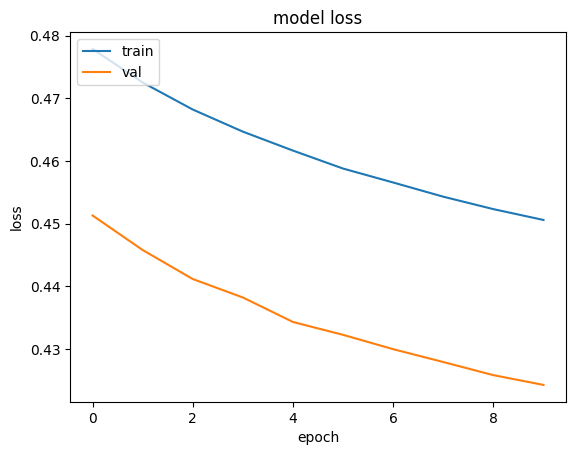

In [236]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Аналитика

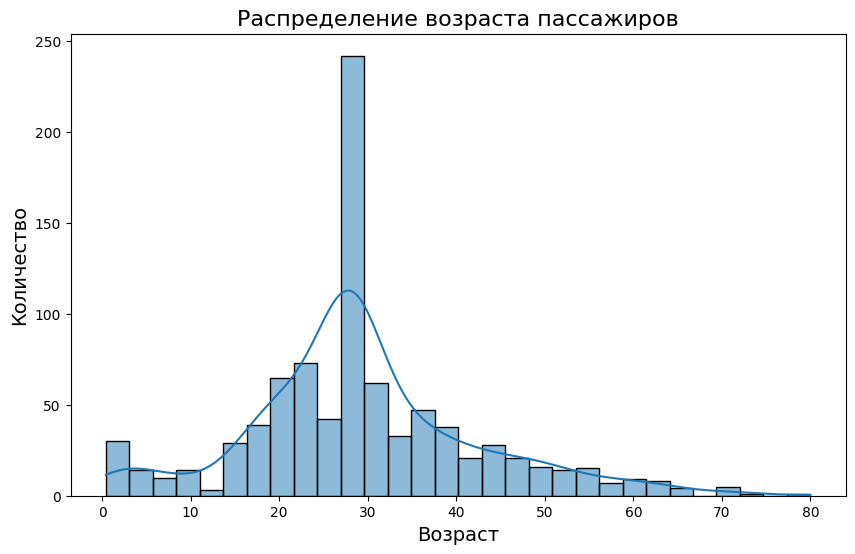

In [237]:
# @title График плотности для возраста
import seaborn as sns

# Создаем график плотности для возраста пассажиров
plt.figure(figsize=(10, 6))

# Создаем гистограмму с плотностью распределения (KDE) для столбца 'Age' в DataFrame df
sns.histplot(df['Age'], kde=True, bins=30)

plt.title('Распределение возраста пассажиров', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show()

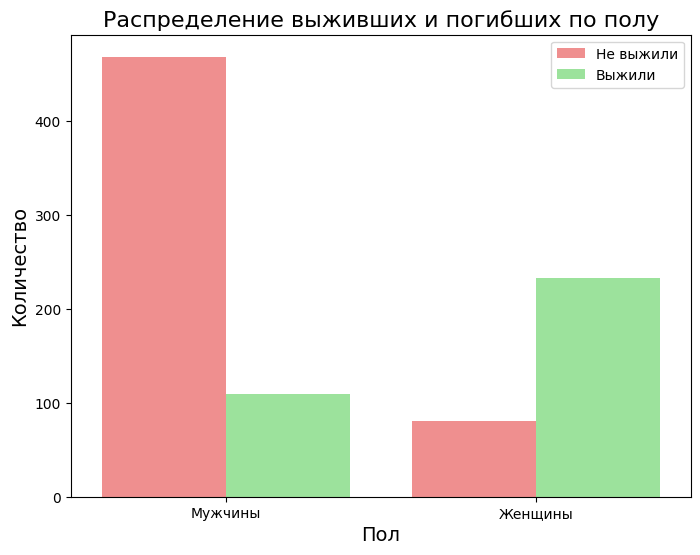

In [238]:
# @title Распределение выживших по полу

df['Sex'] = df['Sex'].replace({0: 'Женщины', 1: 'Мужчины'})

# Создаем график распределения выживших по полу
plt.figure(figsize=(8, 6))
# Строим столбчатую диаграмму с учетом пола и статуса выживания
sns.countplot(x='Sex', hue='Survived', data=df, palette={0: '#FF7F7F', 1: '#90EE90'})

plt.title('Распределение выживших и погибших по полу', fontsize=16)
plt.xlabel('Пол', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.legend(['Не выжили', 'Выжили'])
plt.show()


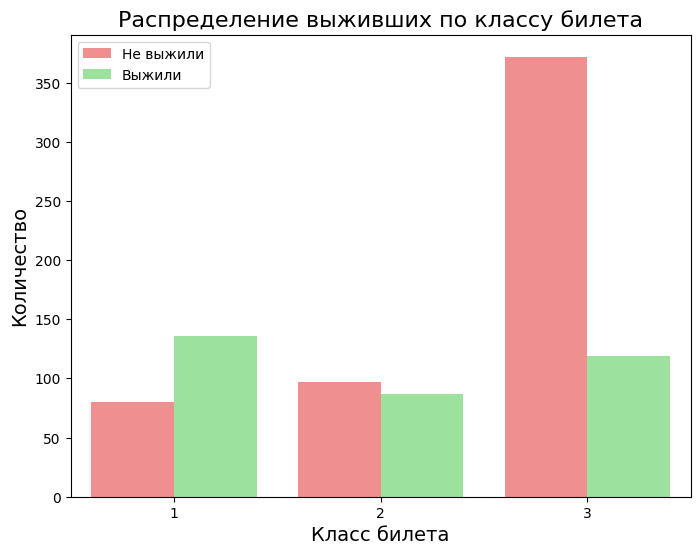

In [239]:
# @title Выживаемость в зависимости от класса

#Создаем график выживаемости в зависимости от класса билета
plt.figure(figsize=(8, 6))

# Строим столбчатую диаграмму для распределения выживших по классу билета
sns.countplot(x='Pclass', hue='Survived', data=df, palette={0: '#FF7F7F', 1: '#90EE90'})

plt.title('Распределение выживших по классу билета', fontsize=16)
plt.xlabel('Класс билета', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.legend(['Не выжили', 'Выжили'])
plt.show()


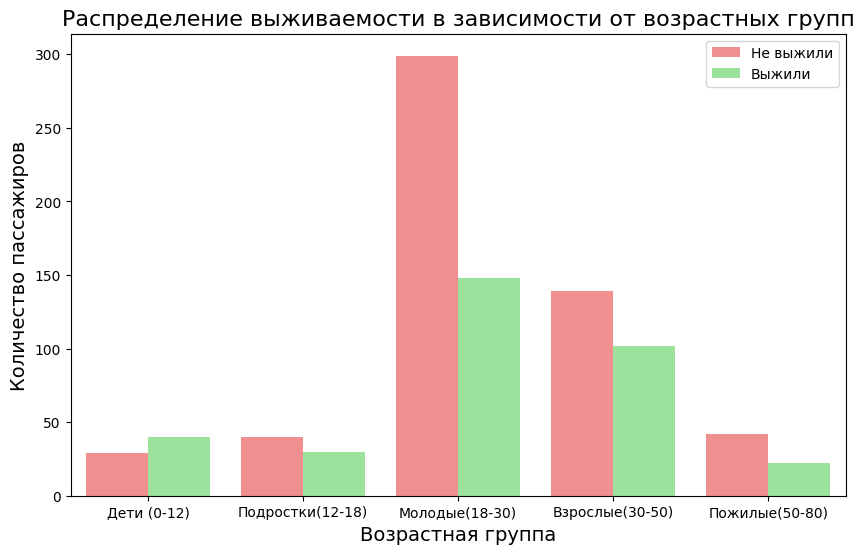

In [240]:
# @title Выживаемость в зависимости от возрастных групп

# Создаем возрастные группы на основе возраста пассажиров
# Используем pd.cut() для разбиения возраста на группы и задаем соответствующие метки
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Дети (0-12)', 'Подростки(12-18)', 'Молодые(18-30)', 'Взрослые(30-50)', 'Пожилые(50-80)'])

# Создаем график распределения выживаемости в зависимости от возрастных групп
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму для распределения выживших по возрастным группам
sns.countplot(x='AgeGroup', hue='Survived', data=df, palette={0: '#FF7F7F', 1: '#90EE90'})

plt.title('Распределение выживаемости в зависимости от возрастных групп', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Количество пассажиров', fontsize=14)
plt.legend(['Не выжили', 'Выжили'])
plt.show()


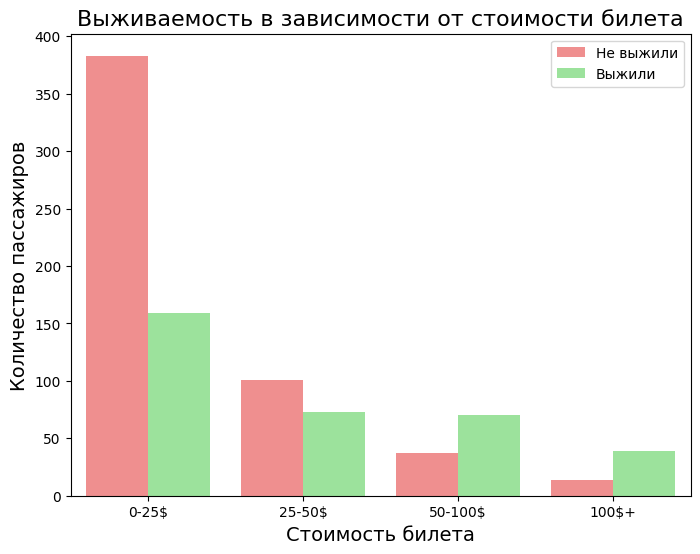

In [241]:
# @title Выживаемость в зависимости от стоимости билета

# Создаем группы по стоимости билета на основе значений в столбце 'Fare'
# Используем pd.cut() для разбиения стоимости на группы и задаем соответствующие метки
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 25, 50, 100, 600], labels=['0-25$', '25-50$', '50-100$', '100$+'])

# Создаем график распределения выживаемости в зависимости от стоимости билета
plt.figure(figsize=(8, 6))

# Строим столбчатую диаграмму для распределения выживших по группам стоимости билета
sns.countplot(x='FareGroup', hue='Survived', data=df, palette={0: '#FF7F7F', 1: '#90EE90'})

plt.title('Выживаемость в зависимости от стоимости билета', fontsize=16)
plt.xlabel('Стоимость билета', fontsize=14)
plt.ylabel('Количество пассажиров', fontsize=14)
plt.legend(['Не выжили', 'Выжили'])
plt.show()


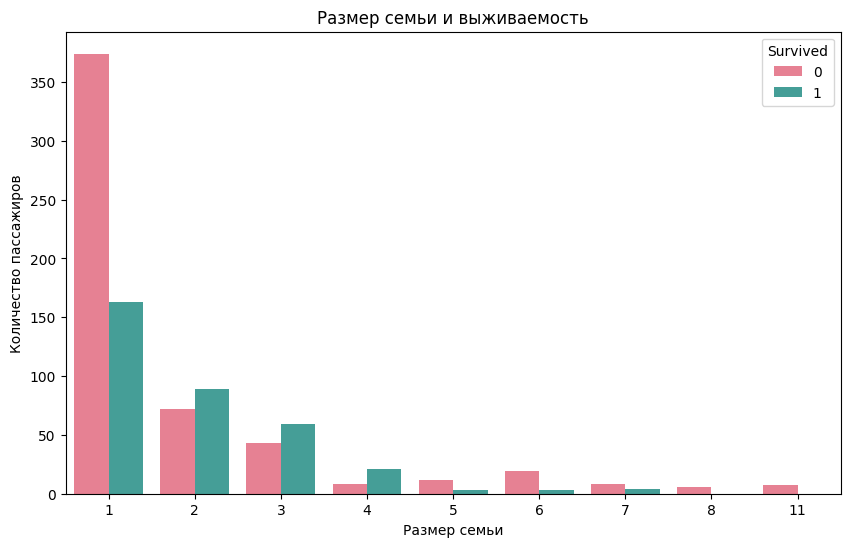

In [242]:
# @title Влияние размера семьи на выживаемость

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(10, 6))
sns.countplot(x="FamilySize", hue="Survived", data=df, palette="husl")
plt.title("Размер семьи и выживаемость")
plt.xlabel("Размер семьи")
plt.ylabel("Количество пассажиров")
plt.show()


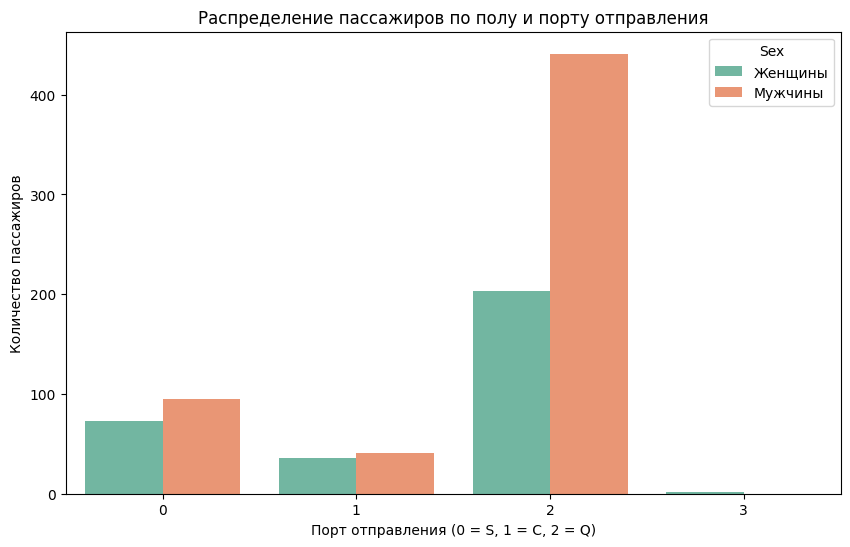

In [243]:
# @title Выживаемость по полу и порту отправления
plt.figure(figsize=(10, 6))
sns.countplot(x="Embarked", hue="Sex", data=df, palette="Set2")
plt.title("Распределение пассажиров по полу и порту отправления")
plt.xlabel("Порт отправления (0 = S, 1 = C, 2 = Q)")
plt.ylabel("Количество пассажиров")
plt.show()


# Разбиение данных

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    int64   
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    int64   
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    int64   
 11  Embarked     891 non-null    int64   
 12  AgeGroup     891 non-null    category
 13  FareGroup    876 non-null    category
 14  FamilySize   891 non-null    int64   
dtypes: category(2), float64(2), int64(10), object(1)
memory usage: 92.8+ KB


In [245]:
df.shape

(891, 15)

In [246]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,FamilySize
0,1,0,3,108,Мужчины,22.0,1,0,523,7.2500,147,2,Молодые(18-30),0-25$,2
1,2,1,1,190,Женщины,38.0,1,0,596,71.2833,81,0,Взрослые(30-50),50-100$,2
2,3,1,3,353,Женщины,26.0,0,0,669,7.9250,147,2,Молодые(18-30),0-25$,1
3,4,1,1,272,Женщины,35.0,1,0,49,53.1000,55,2,Взрослые(30-50),50-100$,2
4,5,0,3,15,Мужчины,35.0,0,0,472,8.0500,147,2,Взрослые(30-50),0-25$,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,Мужчины,27.0,0,0,101,13.0000,147,2,Молодые(18-30),0-25$,1
887,888,1,1,303,Женщины,19.0,0,0,14,30.0000,30,2,Молодые(18-30),25-50$,1
888,889,0,3,413,Женщины,28.0,1,2,675,23.4500,147,2,Молодые(18-30),0-25$,4
889,890,1,1,81,Мужчины,26.0,0,0,8,30.0000,60,0,Молодые(18-30),25-50$,1


In [247]:
df['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [248]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,FamilySize
0,1,0,3,108,Мужчины,22.0,1,0,523,7.2500,147,2,Молодые(18-30),0-25$,2
1,2,1,1,190,Женщины,38.0,1,0,596,71.2833,81,0,Взрослые(30-50),50-100$,2
2,3,1,3,353,Женщины,26.0,0,0,669,7.9250,147,2,Молодые(18-30),0-25$,1
3,4,1,1,272,Женщины,35.0,1,0,49,53.1000,55,2,Взрослые(30-50),50-100$,2
4,5,0,3,15,Мужчины,35.0,0,0,472,8.0500,147,2,Взрослые(30-50),0-25$,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,Мужчины,27.0,0,0,101,13.0000,147,2,Молодые(18-30),0-25$,1
887,888,1,1,303,Женщины,19.0,0,0,14,30.0000,30,2,Молодые(18-30),25-50$,1
888,889,0,3,413,Женщины,28.0,1,2,675,23.4500,147,2,Молодые(18-30),0-25$,4
889,890,1,1,81,Мужчины,26.0,0,0,8,30.0000,60,0,Молодые(18-30),25-50$,1


In [249]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [250]:
# Find Outliers in DataFrame

import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5, 100],
    'B': [10, 12, 14, 13, 15, 200],
    'C': [5, 6, 7, 8, 9, 300]
}

df = pd.DataFrame(data)

# Function to find outliers
def find_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Get outliers
outliers = find_outliers(df)
print(outliers)

{'A':      A    B    C
5  100  200  300, 'B':      A    B    C
5  100  200  300, 'C':      A    B    C
5  100  200  300}


# Обучение


## Модель 1

In [251]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

In [252]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели с L2-регуляризацией и Batch Normalization
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

# Компиляция модели с измененной скоростью обучения
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели с большим количеством эпох и уменьшенным batch_size
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.5790 - loss: 0.9288 - val_accuracy: 0.7692 - val_loss: 0.7684
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6401 - loss: 0.8473 - val_accuracy: 0.7762 - val_loss: 0.7231
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6326 - loss: 0.8427 - val_accuracy: 0.7902 - val_loss: 0.6853
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6635 - loss: 0.7996 - val_accuracy: 0.7902 - val_loss: 0.6559
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6440 - loss: 0.8050 - val_accuracy: 0.7902 - val_loss: 0.6350
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7393 - loss: 0.6801 - val_accuracy: 0.7902 - val_loss: 0.6157
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6738 - loss: 0.7696 - val_accuracy: 0.7972 - val_loss: 0.5942
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7504 - loss: 0.6523 - val_accuracy: 0.7972 - val_loss

In [253]:
print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 0.78


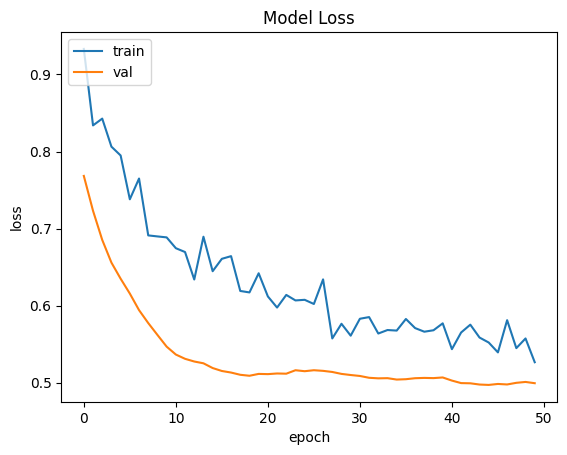

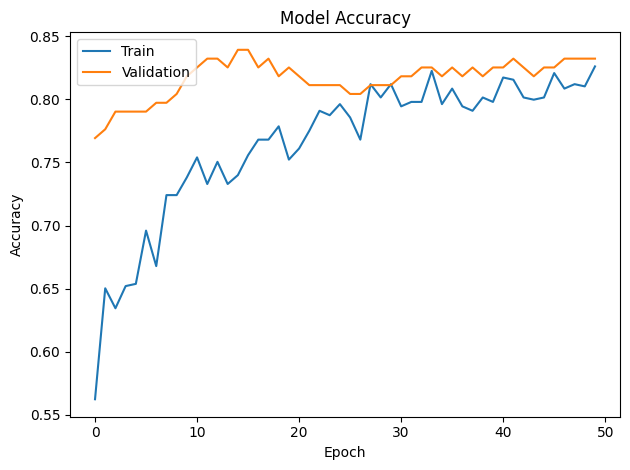

In [254]:
# Визуализация loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Мodel Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Визуализация accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Модель 2

In [255]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

In [256]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели с L2-регуляризацией
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Настройка callback-функций
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели с большим количеством эпох и уменьшенным batch_size
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[reduce_lr, early_stop])



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5423 - loss: 0.7404 - val_accuracy: 0.6923 - val_loss: 0.6766 - learning_rate: 0.0010
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6014 - loss: 0.7043 - val_accuracy: 0.7133 - val_loss: 0.6285 - learning_rate: 0.0010
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6388 - loss: 0.6963 - val_accuracy: 0.7483 - val_loss: 0.5925 - learning_rate: 0.0010
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7015 - loss: 0.6427 - val_accuracy: 0.7552 - val_loss: 0.5595 - learning_rate: 0.0010
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7144 - loss: 0.6029 - val_accuracy: 0.7762 - val_loss: 0.5289 - learning_rate: 0.0010
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7758 - loss: 0.5564 - val_accuracy: 0.8182 - val_loss: 0.5068 - learning_rate: 0.0010
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7383 - loss: 0.5692 - val_accuracy: 0.8392 - va

In [257]:
print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 0.78


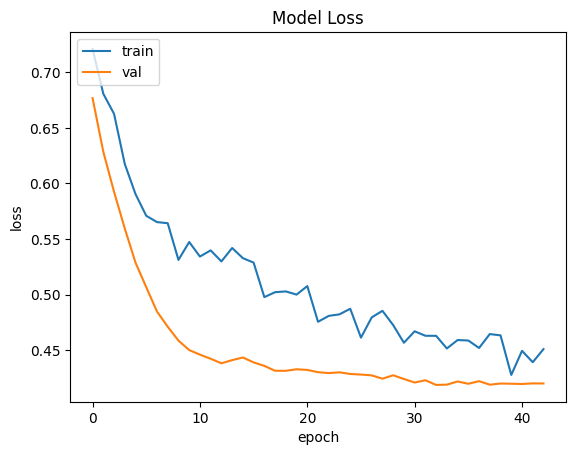

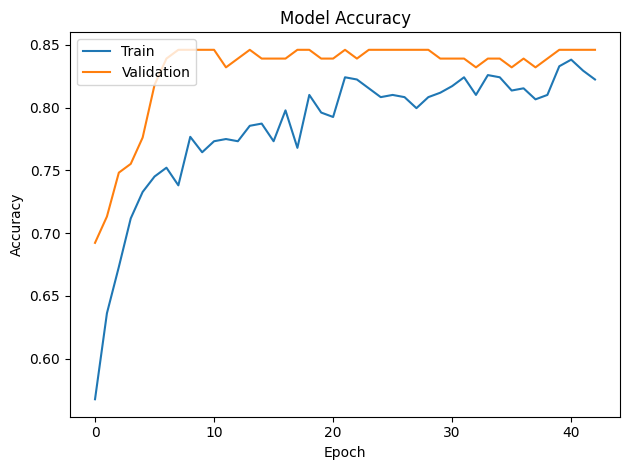

In [258]:
# Визуализация loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Мodel Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Визуализация accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Модель 3


In [259]:
from keras.optimizers import Adam
from keras.layers import LeakyReLU

In [260]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0005)))
model.add(LeakyReLU(alpha=0.1))  # Вместо ReLU используем LeakyReLU
model.add(Dropout(0.3))

model.add(Dense(64, kernel_regularizer=l2(0.0005)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(32, kernel_regularizer=l2(0.0005)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [261]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

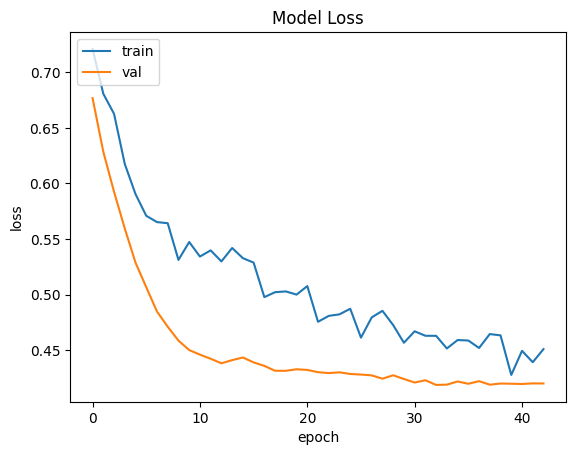

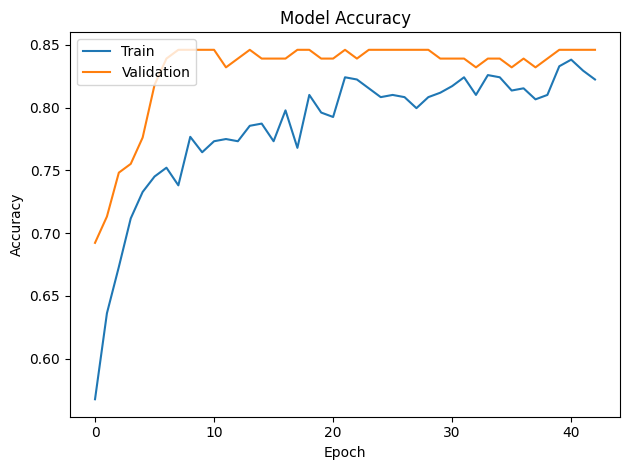

In [262]:
# Визуализация loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Мodel Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Визуализация accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Кросс-Валидация

In [263]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [266]:
# Функция для создания модели
def create_model():
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    from keras.regularizers import l2
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Инициализация кросс-валидации
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_results = []

X = X.to_numpy()
y = y.to_numpy()

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"\nTraining for fold {fold + 1}...")

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Стандартизация данных
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Создание и обучение модели
    model = create_model()
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Предсказание на валидационной выборке
    y_pred = (model.predict(X_val) > 0.5).astype(int)

    # Сохранение результатов
    fold_results.append((y_val, y_pred))

    # Отчет о классификации и матрица ошибок
    print("classification_report:")
    print(classification_report(y_val, y_pred))

    print("confusion_matrix:")
    cm = confusion_matrix(y_val, y_pred)
    print(cm)



Training for fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
classification_report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       177
           1       0.81      0.72      0.76       120

    accuracy                           0.82       297
   macro avg       0.82      0.80      0.81       297
weighted avg       0.82      0.82      0.82       297

confusion_matrix:
[[157  20]
 [ 34  86]]

Training for fold 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
classification_report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.85       185
           1       0.78      0.71      0.74       112

    accuracy                           0.81       297
   macro avg       0.81      0.79      0.80       297
weighted avg       0.81      0.81      0.81       297

confusion_matrix:
[[162  23]
 [ 32  80]]

Training for fold 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
classification_report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       187
           1       0.79      0.67      0.73       110

    accuracy                           0.81       297
   macro avg       0.80      0.78      0.79       297
weighted avg       0.81      0.81      0.81       297

confusion_matrix:
[[167  20]
 [ 36  74]]


In [268]:
# Вывод итогов по всем фолдам
# Подсчет истинно положительных, истинно отрицательных, ложноположительных и ложноотрицательных
tn, fp, fn, tp = 0, 0, 0, 0

for y_val, y_pred in fold_results:
    tn_fold, fp_fold, fn_fold, tp_fold = confusion_matrix(y_val, y_pred).ravel()
    tn += tn_fold
    fp += fp_fold
    fn += fn_fold
    tp += tp_fold

# Расшифровка матрицы ошибок
print("\nРасшифровка матрицы ошибок:")
print(f"Модель предсказала, что погибнет, а по факту не погиб = {fn}")
print(f"Модель предсказала, что не погибнет, а по факту погиб = {fp}")
print(f"Модель предсказала, что не погибнет, и по факту не погиб = {tn}")
print(f"Модель предсказала, что погибнет, и по факту погиб = {tp}")


Расшифровка матрицы ошибок:
Модель предсказала, что погибнет, а по факту не погиб = 102
Модель предсказала, что не погибнет, а по факту погиб = 63
Модель предсказала, что не погибнет, и по факту не погиб = 486
Модель предсказала, что погибнет, и по факту погиб = 240


Окончательный вывод о проделанной работе:

# Вывод о работе

Во время лабораторной работы я научился предобрабатывать и анализировать данные перед обучением модели.
Мною была обучена модель с использованием кросс-валидации с 3 фолдами. Каждый фолд предоставил отчеты о классификации и матрицы ошибок, что позволило детально проанализировать производительность модели. Итоговые значения предсказаний позволили нам понять, где модель ошибается и как ее можно улучшить в дальнейшем. Эти результаты помогут в дальнейшем улучшении модели и ее точности.